## Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Data Dictionary

1. age - the age of an individual
2. workclass - a general term to represent the employment status of an individual
3. final weight - in other words, this is the number of people the census believes the entry represents
4. education - the highest level of education achieved by an individual
5. education_num - the highest level of education achieved in numerical form.
6. marital_status - marital status of an individual. Married civ spouse corresponds to a civilian spouse while Married AF  
7. spouse is a spouse in the Armed Forces
8. occupation - the general type of occupation of an individual
9. relationship - represents what this individual is relative to others
10. race - descriptions of an individual’s race
11. sex - the biological sex of the individual
12. capital_gain - capital gains for an individual
13. capital_loss - capital loss for an individual
14. hours_per_week - the hours an individual has reported to work per week continuous
15. income - whether or not an individual makes more than 50,000 dollars annually (the label)

## Framing Problem

 For now, we can categorize our Machine Learning System as:
 
1. Supervised Learning Task- we are given labled training data
2. Classification task- our model is expected to predict the income=>50k or income=<50k using given features.

In [1]:
#Importing Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Dataset
df= pd.read_csv('adult.csv',header=0)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
#we have to replace ? with null
df.replace({"?": np.nan}, inplace = True)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
#checking null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
#handling Missing Values
df['workclass']= df['workclass'].fillna((df['workclass'].mode())[0])
df['occupation']= df['occupation'].fillna((df['occupation'].mode())[0])
df['native.country']= df['native.country'].fillna((df['native.country'].mode())[0])

In [13]:
#again checking null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## EDD

In [14]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='capital.gain'>

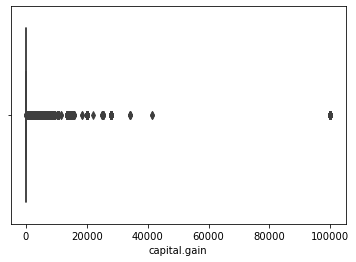

In [15]:
#checking outliers in capital.gain
sns.boxplot(df['capital.gain'])

In [16]:
#removing outliers in capital.gain
uv= np.percentile(df['capital.gain'],[99])[0]
uv

15024.0

In [17]:
df[(df['capital.gain']>uv)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,67,Self-emp-inc,411007,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,15831,0,40,United-States,>50K
1776,67,Local-gov,103315,Masters,14,Never-married,Exec-managerial,Other-relative,White,Female,15831,0,72,United-States,>50K
1777,67,Private,224984,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,15831,0,16,Germany,>50K
1778,69,Private,182862,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,15831,0,40,United-States,>50K


In [18]:
df['capital.gain'][(df['capital.gain']>2*uv)]= 2*uv

<AxesSubplot:xlabel='capital.gain'>

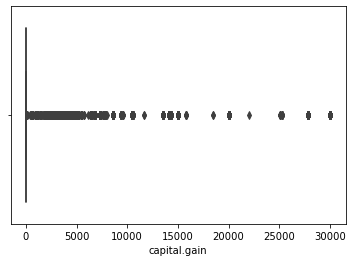

In [19]:
sns.boxplot(df['capital.gain'])

<AxesSubplot:xlabel='capital.loss'>

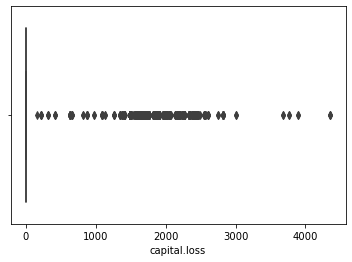

In [20]:
#checking outliers in capital.loss
sns.boxplot(df['capital.loss'])

In [21]:
#removing outliers in capital.gain
uv= np.percentile(df['capital.loss'],[99])[0]
uv

1980.0

In [22]:
df[(df['capital.loss']>uv)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,21,Private,40052,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,2001,45,United-States,<=50K
321,48,Private,93476,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,Female,0,2001,40,United-States,<=50K
322,34,Private,174789,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,2001,40,United-States,<=50K
323,31,Private,189759,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,2001,40,United-States,<=50K


In [23]:
df['capital.loss'][(df['capital.loss']>uv)]= uv

<AxesSubplot:xlabel='capital.loss'>

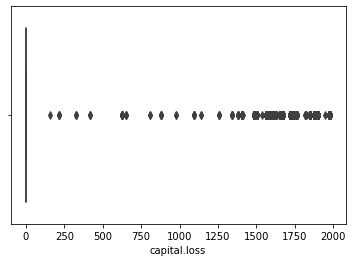

In [24]:
sns.boxplot(df['capital.loss'])

In [25]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,1980,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,1980,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,1980,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,1980,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,1980,40,United-States,<=50K


In [26]:
#converting object columns strings to lower case
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.lower()
        
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,private,77053,hs-grad,9,widowed,prof-specialty,not-in-family,white,female,0,1980,40,united-states,<=50k
1,82,private,132870,hs-grad,9,widowed,exec-managerial,not-in-family,white,female,0,1980,18,united-states,<=50k
2,66,private,186061,some-college,10,widowed,prof-specialty,unmarried,black,female,0,1980,40,united-states,<=50k
3,54,private,140359,7th-8th,4,divorced,machine-op-inspct,unmarried,white,female,0,1980,40,united-states,<=50k
4,41,private,264663,some-college,10,separated,prof-specialty,own-child,white,female,0,1980,40,united-states,<=50k


In [27]:
df= pd.get_dummies(df, columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income'],drop_first=True)

In [28]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,...,native.country_puerto-rico,native.country_scotland,native.country_south,native.country_taiwan,native.country_thailand,native.country_trinadad&tobago,native.country_united-states,native.country_vietnam,native.country_yugoslavia,income_>50k
0,90,77053,9,0,1980,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,1980,18,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,1980,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,1980,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,1980,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## test train split

In [36]:
X= df.drop("income_>50k",axis=1)
y= df['income_>50k']

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 97), (6513, 97), (26048,), (6513,))